In [31]:
import numpy as np
import graphviz
from sklearn import tree
import pandas as pd
from sklearn.metrics import precision_score,f1_score, recall_score, accuracy_score


ModuleNotFoundError: No module named 'chefboost'

In [2]:
traindata = pd.read_csv("/Users/Quan/Documents/TrainingSetTask4.csv")
testdata = pd.read_csv("/Users/Quan/Documents/TestingSetTask4.csv")

In [3]:
traindata = traindata.drop(["Unnamed: 0","Date","University"], axis = 1)
testdata = testdata.drop(["Unnamed: 0","Date","University"],axis = 1)


In [4]:
for x in range(len(traindata)):
    if traindata["Home"][x] == "Home":
        traindata["Home"][x] = 1
    if traindata["Home"][x] == "Away":
        traindata["Home"][x] = 0
        
for x in range(len(traindata)):
    if traindata["Top25"][x] == "Out":
        traindata["Top25"][x] = 0
    if traindata["Top25"][x] == "In":
        traindata["Top25"][x] = 1
        
for x in range(len(traindata)):
    if traindata["Media"][x] == "1-NBC":
        traindata["Media"][x] = 1
    if traindata["Media"][x] == "2-ESPN":
        traindata["Media"][x] = 2
    if traindata["Media"][x] == "3-FOX":
        traindata["Media"][x] = 3
    if traindata["Media"][x] == "4-ABC":
        traindata["Media"][x] = 4
        
for x in range(len(traindata)):
    if traindata["WinLose"][x] == "Win":
        traindata["WinLose"][x] = 1
    if traindata["WinLose"][x] == "Lose":
        traindata["WinLose"][x] = 0
        
for x in range(len(testdata)):
    if testdata["Home"][x] == "Home":
        testdata["Home"][x] = 1
    if testdata["Home"][x] == "Away":
        testdata["Home"][x] = 0
        
for x in range(len(testdata)):
    if testdata["Top25"][x] == "Out":
        testdata["Top25"][x] = 0
    if testdata["Top25"][x] == "In":
        testdata["Top25"][x] = 1
        
for x in range(len(testdata)):
    if testdata["Media"][x] == "1-NBC":
        testdata["Media"][x] = 1
    if testdata["Media"][x] == "2-ESPN":
        testdata["Media"][x] = 2
    if testdata["Media"][x] == "3-FOX":
        testdata["Media"][x] = 3
    if testdata["Media"][x] == "4-ABC":
        testdata["Media"][x] = 4
        

        
    
    

In [5]:
traindata["WinLose"]=traindata["WinLose"].astype('int')
dtent = tree.DecisionTreeClassifier(criterion = "entropy")
predictors = traindata.drop(['WinLose'], axis=1)
response = traindata["WinLose"]
dtentfit = dtent.fit(predictors,response)

In [6]:
tree.plot_tree(dtentfit)

[Text(248.0, 277.2, 'X[1] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(124.0, 92.39999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(372.0, 92.39999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

In [7]:
data = tree.export_graphviz(dtent,out_file=None,feature_names= ["Home","Top25","Media"],class_names = ["Lose","Win"],filled=True,rounded=True,special_characters=True)

In [8]:
graph = graphviz.Source(data)

In [9]:
graph.render(filename = "Q4PartlID3", directory = "/Users/QUAN/Documents/", format = "png")

'/Users/QUAN/Documents/Q4PartlID3.png'

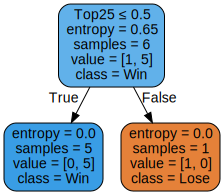

In [10]:
dtentpred = dtentfit.predict(testdata)
datapred = tree.export_graphviz(dtent,out_file=None,feature_names= ["Home","Top25","Media"],class_names = ["Lose","Win"],filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(datapred)
graph

In [11]:
Home = testdata['Home']
Top25 = testdata['Top25']
Media = testdata['Media']

output = pd.DataFrame({ 'Home' : Home,'Top25' : Top25 ,'Media':Media,'WinLose': dtentpred })
output.to_csv('task4part1ent.csv', index=False)

In [12]:
#NOW TO SPLIT USING GINI, of course we have to redefine the testing and training set 
#but I will not do that because we already understand that we have to. 


In [13]:
traindata = pd.read_csv("/Users/Quan/Documents/TrainingSetTask4.csv")
testdata = pd.read_csv("/Users/Quan/Documents/TestingSetTask4.csv")

traindata = traindata.drop(["Unnamed: 0","Date","University"], axis = 1)
testdata = testdata.drop(["Unnamed: 0","Date","University"],axis = 1)

for x in range(len(traindata)):
    if traindata["Home"][x] == "Home":
        traindata["Home"][x] = 1
    if traindata["Home"][x] == "Away":
        traindata["Home"][x] = 0
        
for x in range(len(traindata)):
    if traindata["Top25"][x] == "Out":
        traindata["Top25"][x] = 0
    if traindata["Top25"][x] == "In":
        traindata["Top25"][x] = 1
        
for x in range(len(traindata)):
    if traindata["Media"][x] == "1-NBC":
        traindata["Media"][x] = 1
    if traindata["Media"][x] == "2-ESPN":
        traindata["Media"][x] = 2
    if traindata["Media"][x] == "3-FOX":
        traindata["Media"][x] = 3
    if traindata["Media"][x] == "4-ABC":
        traindata["Media"][x] = 4
        
for x in range(len(traindata)):
    if traindata["WinLose"][x] == "Win":
        traindata["WinLose"][x] = 1
    if traindata["WinLose"][x] == "Lose":
        traindata["WinLose"][x] = 0
        
for x in range(len(testdata)):
    if testdata["Home"][x] == "Home":
        testdata["Home"][x] = 1
    if testdata["Home"][x] == "Away":
        testdata["Home"][x] = 0
        
for x in range(len(testdata)):
    if testdata["Top25"][x] == "Out":
        testdata["Top25"][x] = 0
    if testdata["Top25"][x] == "In":
        testdata["Top25"][x] = 1
        
for x in range(len(testdata)):
    if testdata["Media"][x] == "1-NBC":
        testdata["Media"][x] = 1
    if testdata["Media"][x] == "2-ESPN":
        testdata["Media"][x] = 2
    if testdata["Media"][x] == "3-FOX":
        testdata["Media"][x] = 3
    if testdata["Media"][x] == "4-ABC":
        testdata["Media"][x] = 4



traindata["WinLose"]=traindata["WinLose"].astype('int')
dtgini = tree.DecisionTreeClassifier(criterion = "gini")
predictors = traindata.drop(['WinLose'], axis=1)
response = traindata["WinLose"]
dtginifit = dtgini.fit(predictors,response)

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

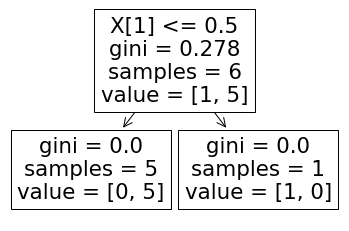

In [14]:
tree.plot_tree(dtginifit)

In [15]:
datagini = tree.export_graphviz(dtgini,out_file=None,feature_names= ["Home","Top25","Media"],class_names = ["Lose","Win"],filled=True,rounded=True,special_characters=True)

In [16]:
graph = graphviz.Source(datagini)

In [17]:
graph.render(filename = "Q4Part1Cart", directory = "/Users/QUAN/Documents/", format = "png")

'/Users/QUAN/Documents/Q4Part1Cart.png'

In [18]:
dtginipred=dtgini.predict(testdata)

In [19]:
Home = testdata['Home']
Top25 = testdata['Top25']
Media = testdata['Media']

output = pd.DataFrame({ 'Home' : Home,'Top25' : Top25 ,'Media':Media,'WinLose': dtginipred })
output.to_csv('task4part1gini.csv', index=False)

In [20]:
#Part 4 Question 2

In [21]:
train = {'outlook':[1,1,2,3,3,3,2,1,1,3,1,2,2,3],'temp':[1,1,1,2,3,3,3,2,3,2,2,2,1,2],'humidity':[1,1,1,1,0,0,0,1,0,0,0,1,0,1],'windy':[0,1,0,0,0,1,1,0,0,0,1,1,0,1],'play':[0,0,1,1,1,0,1,0,1,1,1,1,1,0]}

In [22]:
traindata = pd.DataFrame(train)

'/Users/QUAN/Documents/Q4Part2ID3.png'

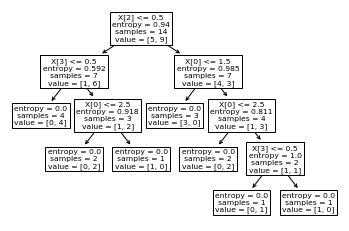

In [23]:
traindata["play"]=traindata["play"].astype('int')
dtent = tree.DecisionTreeClassifier(criterion = "entropy")
predictors = traindata.drop(['play'], axis = 1)
response = traindata['play']
dtentfit = dtent.fit(predictors,response)
tree.plot_tree(dtentfit)
data = tree.export_graphviz(dtent,out_file=None,feature_names= ["Outlook","Temp","Humidity","Windy"],class_names = ["Yes","No"],filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph.render(filename = "Q4Part2ID3", directory = "/Users/QUAN/Documents/", format = "png")

'/Users/QUAN/Documents/Q4Part2Cart.png'

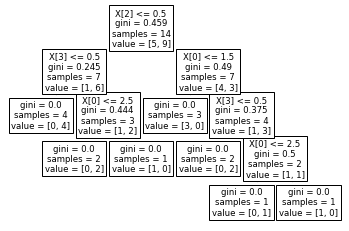

In [24]:
traindata["play"]=traindata["play"].astype('int')
dtgini = tree.DecisionTreeClassifier(criterion = "gini")
predictors = traindata.drop(['play'], axis = 1)
response = traindata['play']
dtginifit = dtgini.fit(predictors,response)
tree.plot_tree(dtginifit)
data = tree.export_graphviz(dtgini,out_file=None,feature_names= ["Outlook","Temp","Humidity","Windy"],class_names = ["Yes","No"],filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph.render(filename = "Q4Part2Cart", directory = "/Users/QUAN/Documents/", format = "png")

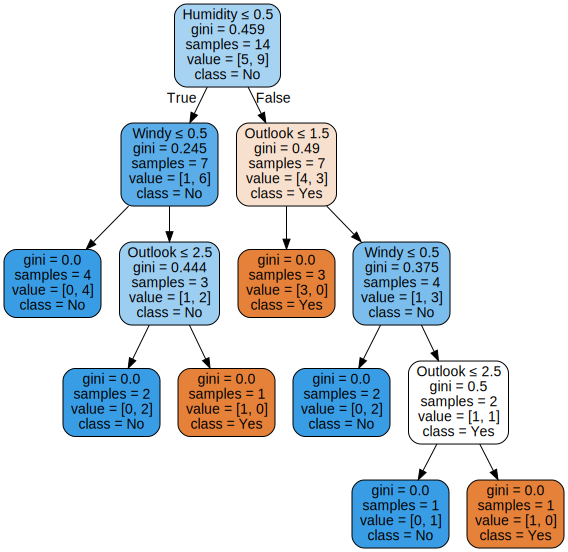

In [25]:
graph

In [26]:
#Part 5 Question 1



[Text(186.0, 195.696, 'X[2] <= 2.5\nentropy = 0.98\nsamples = 24\nvalue = [10, 14]'),
 Text(111.60000000000001, 152.208, 'X[1] <= 0.5\nentropy = 0.837\nsamples = 15\nvalue = [4, 11]'),
 Text(74.4, 108.72, 'X[0] <= 0.5\nentropy = 0.684\nsamples = 11\nvalue = [2, 9]'),
 Text(37.2, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 65.232, 'X[2] <= 1.5\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(74.4, 21.744, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 108.72, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(260.40000000000003, 152.208, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(223.20000000000002, 108.72, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(186.0, 65.232, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(260.40000000000003, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.6, 108.72, 

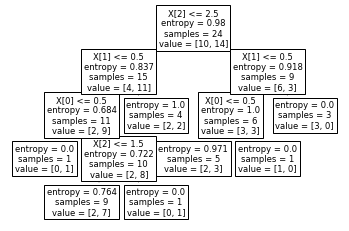

In [27]:
train5 = {'home': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
            'top': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
            'media': [1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 1, 1, 2, 4, 1, 1, 5, 1, 1, 4],
            'result': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ]}
test5 = {'home': [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
           'top': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
           'media': [1, 1, 2, 3, 1, 4, 1, 1, 1, 4, 1, 4]}
y = [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]

traindata5 = pd.DataFrame(data = train5)
testdata5 = pd.DataFrame(data = test5)

dtent5 = tree.DecisionTreeClassifier(criterion="entropy")
dtentropy5 = dtent5.fit(traindata5.iloc[:, :3], traindata5['result'])
tree.plot_tree(dtent5.fit(traindata5.iloc[:, :3], traindata5['result']))





In [28]:
data5 = tree.export_graphviz(dtent5,out_file=None,feature_names= ["Home","Top25","Media"],class_names = ["Lose","Win"],filled=True,rounded=True,special_characters=True)

In [29]:
graph = graphviz.Source(data5)
y_pred = dtentropy5.predict(testdata5)

precision = precision_score(y, y_pred)
F1 = f1_score(y, y_pred)
recall = recall_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Precision Score: ", precision)
print("F1 Score: ", F1)
print("Recall Score: ", recall)
print("Accuracy Score: ", accuracy)
print("Prediction:", y_pred)

Precision Score:  1.0
F1 Score:  0.9411764705882353
Recall Score:  0.8888888888888888
Accuracy Score:  0.9166666666666666
Prediction: [1 0 1 1 1 1 0 1 1 0 1 0]


In [30]:
graph.render(filename = "Q5ID3", directory = "/Users/QUAN/Documents/", format = "png")

'/Users/QUAN/Documents/Q5ID3.png'